In [1]:
import tensorflow as tf
a = tf.Variable(1, name='a')
b = tf.Variable(2, name='b')
f = a+b
tf.print(f)

3


In [7]:
#HANDWRITING RECOGNIZATION (MNIST)

In [8]:
#Prepare mnist data
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
#MNIST dataset parameters
num_classes = 100 # total classes (0-9 digit)
num_features = 784 # data features(image shape: 28 x 28)

(x_train, y_train), (x_test, y_test) = mnist.load_data()

#convert to float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

#Flatten images to 1-D vector of 784 features(28 x 28)
x_train, x_teste = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

#Normalize images value from [0, 255] to [0, 1]
x_train, x_test = x_train/255.0, x_test/255.0

In [16]:
def display_image(num):
  #Print this sample's label
  label = y_train[num]

  #Reshape the 784 values to 28 x 28 image
  image = x_train[num].reshape([28,28])
  plt.title("Sample: %d Label: %d"%(num, label))
  plt.imshow(image, cmap = plt.get_cmap('gray_r'))
  plt.show()

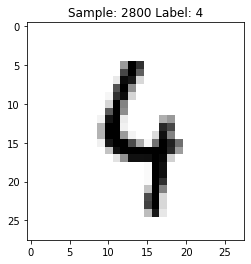

In [18]:
display_image(2800)

In [19]:
images = x_train[0].reshape([1, 784])
for i in range(1, 1000):
  images = np.concatenate((images, x_train[i].reshape([1, 784])))
  plt.imshow(images, cmap=plt.get_cmap('gray_r'))
plt.show()

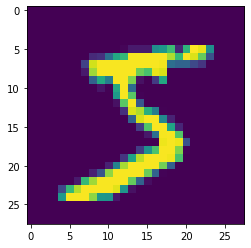

In [20]:
plt.imshow(x_train[0].reshape(28, 28))

In [45]:
#Note :  Neural networks are inspired by Brain but they do not exactly work the way brain works

In [46]:
# Training Parameters.
learning_rate=0.001
training_steps =3000
batch_size = 250
display_step = 100

#Netowrk parameter
n_hidden = 512 # Number of neurons


In [47]:
#Use tf.data API to shuffle and batch data.
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(6000).batch(batch_size).prefetch(1)

In [65]:
# Store layers weight and bias

#A random value generator to intilaize weights initially

random_normal = tf.initializers.RandomNormal()
weights ={
	'h': tf.Variable(random_normal([num_features, n_hidden])),
	'out': tf.Variable(random_normal([n_hidden, num_classes]))
}
biases ={
	'b' : tf.Variable((tf.zeros([n_hidden]))),
  'out' : tf.Variable(tf.zeros([num_classes]))
}

In [67]:
#Create model
def neural_net(inputData):
  #Hidden fully connected Layer with 512 neurons.
  hidden_layer = tf.add(tf.matmul(inputData, wieghts['h'], biases['b']))
  #Apply sigmoid to hidden_layer output for non linearity
  hidden_layer = tf.nn.sigmoid(hidden_layer)

  #output fully connected layer with neuron for each class
  out_layer = tf.matmul(hidden_layer, weights['out'], biases['out'])
  #apply softmax to noramlize the logicsto  probability distriution
  return tf.nn.softmax(out_layer)